In [1]:
import yaml
import os

In [2]:
with open("/Users/sigmoid/Documents/PepsiCo - Gen AI PoC/lift_bot_streamlit/config.yaml", "r") as f:
    llm_keys = yaml.safe_load(f)

In [3]:
if llm_keys["open_ai"].strip() != "":
    os.environ["OPENAI_API_KEY"] = llm_keys["open_ai"]

In [4]:
import os
import pandas as pd
from langchain.schema import HumanMessage
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

In [5]:
from main_file import AgentLift

In [6]:
file_path = os.getcwd()

In [7]:
# Load once
df_HY = pd.read_csv(os.path.join(file_path, 'data/Historical_Expenses.csv'))
df_HY["Expense"] = df_HY["Expense"].str.replace(",", "", regex=False).astype(int)

In [8]:
df_CY = pd.read_csv(os.path.join(file_path, 'data/CY_Expense.csv'))

In [9]:
df_Budget = pd.read_csv(os.path.join(file_path, 'data/Budget.csv'))
df_Budget["2023 - Budget"] = df_Budget["2023 - Budget"].str.replace(",", "", regex=False).astype(int)
df_Budget["2024 - Budget"] = df_Budget["2024 - Budget"].str.replace(",", "", regex=False).astype(int)

In [10]:
# Create Agent-Lift instance once
agent_lift = AgentLift(
    df_HY, 
    df_CY, 
    df_Budget, 
    file_path='/Users/sigmoid/Documents/PepsiCo - Gen AI PoC/lift_bot_streamlit/src'
)

🚀 Agent-Lift System initialized!


In [11]:
question = "How are the Tier 1 expenses in CY varying for Mexico & Brazil for Pepsi brand?"

In [12]:
# state = {"messages": [HumanMessage(content=question)], "next": "supervisor"}
# counter = 0
# while state["next"] != "FINISH" and counter < 10:
#     current_state = agent_lift.graph.nodes[state["next"]].invoke(state)
# #     if current_state['next'] == 'FINISH':
# #         break
#     state["messages"] = add_messages(
#         state["messages"], current_state["messages"]
#     )
#     state["next"] = current_state["next"]
    
#     current_state["messages"][0].pretty_print()
#     counter += 1

In [24]:
state = {"messages": [HumanMessage(content=question)], "next": "supervisor"}

In [25]:
current_state = agent_lift.graph.nodes[state["next"]].invoke(state)

In [26]:
current_state

{'messages': [AIMessage(content="The user is asking about the current year's Tier 1 expenses for the Pepsi brand in Mexico and Brazil. This requires analyzing current year expense data to identify variations. The CY Expense Agent is suitable for this task as it specializes in current year data analysis, including trends and comparisons across different dimensions such as regions and brands.", additional_kwargs={}, response_metadata={}, name='supervisor')],
 'next': 'CY Expense Agent'}

In [27]:
current_state['messages'][0].pretty_print()

================================== Ai Message ==================================
Name: supervisor

The user is asking about the current year's Tier 1 expenses for the Pepsi brand in Mexico and Brazil. This requires analyzing current year expense data to identify variations. The CY Expense Agent is suitable for this task as it specializes in current year data analysis, including trends and comparisons across different dimensions such as regions and brands.


In [28]:
state["messages"] = add_messages(
    state["messages"], current_state["messages"]
)
state["next"] = current_state["next"]

Segments are: {'approach': 'To answer this question, I will need to:\n1. Normalize the \'Country\' and \'Brand\' columns for accurate filtering.\n2. Filter the dataset for the \'Country\' values of "Mexico" and "Brazil" and the \'Brand\' value of "PEPSI".\n3. Group the filtered data by \'Year\' and \'Tier 1\' to calculate the total expenses for each combination.\n4. Prepare the data for visualization by pivoting it to have \'Year\' as the index and \'Tier 1\' as columns.\n5. Create a bar chart to visualize the total Tier 1 expenses for each country and tier.', 'code': "import pandas as pd\n\n# Normalize the 'Country' and 'Brand' columns\ndf['Country'] = df['Country'].str.strip().str.upper()\ndf['Brand'] = df['Brand'].str.strip().str.upper()\n\n# Filter for Mexico and Brazil for Pepsi brand\nfiltered_df = df[(df['Country'].isin(['MEXICO', 'BRAZIL'])) & (df['Brand'] == 'PEPSI')]\n\n# Group by Year and Tier 1 to calculate total expenses\ntier_expenses = filtered_df.groupby(['Year', 'Tier 

<Figure size 1000x600 with 0 Axes>

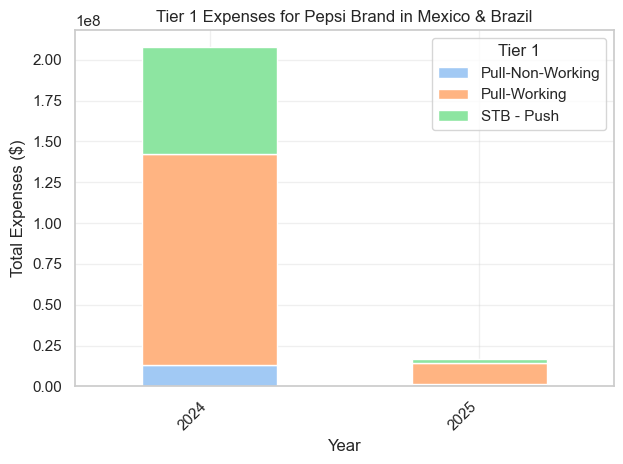

In [30]:
current_state = agent_lift.graph.nodes[state["next"]].invoke(state)

In [31]:
current_state['messages'][0].pretty_print()

================================ Human Message =================================
Name: CY_Expense_Agent

To answer this question, I will need to:
1. Normalize the 'Country' and 'Brand' columns for accurate filtering.
2. Filter the dataset for the 'Country' values of "Mexico" and "Brazil" and the 'Brand' value of "PEPSI".
3. Group the filtered data by 'Year' and 'Tier 1' to calculate the total expenses for each combination.
4. Prepare the data for visualization by pivoting it to have 'Year' as the index and 'Tier 1' as columns.
5. Create a bar chart to visualize the total Tier 1 expenses for each country and tier.
Solution we got from this approach is:
The Tier 1 expenses for the Pepsi brand in Mexico and Brazil vary across different years, with specific trends observed in the spending categories. The visualization will provide a clear comparison of how these expenses are distributed among the different Tier 1 categories for each country over the years.


In [32]:
current_state.keys()

dict_keys(['messages', 'next'])

In [33]:
current_state['messages'][0].content

'To answer this question, I will need to:\n1. Normalize the \'Country\' and \'Brand\' columns for accurate filtering.\n2. Filter the dataset for the \'Country\' values of "Mexico" and "Brazil" and the \'Brand\' value of "PEPSI".\n3. Group the filtered data by \'Year\' and \'Tier 1\' to calculate the total expenses for each combination.\n4. Prepare the data for visualization by pivoting it to have \'Year\' as the index and \'Tier 1\' as columns.\n5. Create a bar chart to visualize the total Tier 1 expenses for each country and tier.\nSolution we got from this approach is:\nThe Tier 1 expenses for the Pepsi brand in Mexico and Brazil vary across different years, with specific trends observed in the spending categories. The visualization will provide a clear comparison of how these expenses are distributed among the different Tier 1 categories for each country over the years.'

In [35]:
current_state['messages'][0].additional_kwargs.get('figure_path')

'plots/plot_79fef8f28af3418fa995b42e311dd736.png'

In [31]:
current_state['messages'][0].additional_kwargs['response']['figure']

'plots/plot_9b809622eca6492c9653b55da598f6cb.png'

In [17]:
current_state['messages'][0].pretty_print()

================================ Human Message =================================
Name: CY_Expense_Agent

To answer this question, I will need to:
1. Filter the data for the Pepsi brand and the countries Mexico and Brazil.
2. Determine the current year (CY) by finding the maximum year in the dataset.
3. Filter the data for the current year.
4. Group the data by Country and Tier 1, and sum the expenses.
5. Compare the Tier 1 expenses for Mexico and Brazil.
6. Visualize the results using a bar chart to show the comparison of Tier 1 expenses for each country.
Solution we got from this approach is:
In the current year 2025, the Tier 1 expenses for the Pepsi brand in Mexico and Brazil vary as follows: [{'Country': 'BRAZIL', 'Tier 1': 'PULL-NON-WORKING', 'Expense': 268612.62}, {'Country': 'BRAZIL', 'Tier 1': 'PULL-WORKING', 'Expense': 118782.42000000001}, {'Country': 'BRAZIL', 'Tier 1': 'STB - PUSH', 'Expense': 857948.71}, {'Country': 'MEXICO', 'Tier 1': 'PULL-NON-WORKING', 'Expense': 999709.

In [127]:
state["messages"] = add_messages(
    state["messages"], current_state["messages"]
)
state["next"] = current_state["next"]